In [16]:
import glob
import numpy as np
import astropy.units as u
from astropy.time import Time

import matplotlib.pyplot as plt
import dynspectools as dtools

%matplotlib inline



Text(0.5,1,'2020-11-15T12:17:02.994')

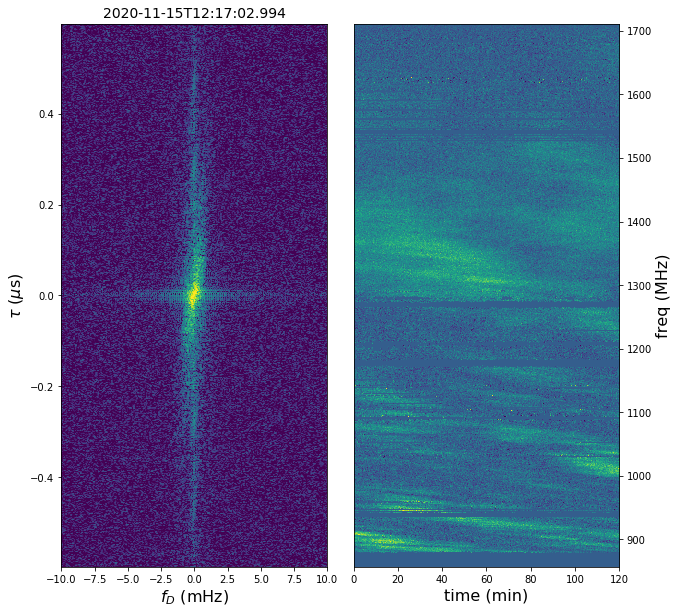

In [15]:
# globbing all .dynspec files
# These are ascii files of dynamic spectra, in psrflux format
dynspecnames = np.sort( glob.glob('/fpra/bband/01/ramain/J1903-7051/*dynspec') )
saveplots = 1

for fname in dynspecnames:

    dynspec, dserr, T, F, psrname = dtools.read_psrflux(fname)

    dt = (T[2]-T[1]).to(u.s)
    # Binning of secondary spectrum, for visual purposes
    bintau = 2
    binft = 1

    CS, ft, tau = dtools.plot_secspec(dynspec, F.value, dt=dt, binft=binft,
                           bintau=1, vm=4., xlim=10.)
    plt.title('{0}'.format(T[0].isot), fontsize=16)
    if saveplots:
        plt.savefig('dspec_quicklook_{0}.png'.format(T[0].isot))